#Ativdade - Aula 1°

1° Criar um gráfico com a biblioteca Pandas que mostre o percentual pelo sexo das pessoas no Titanic.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('sample_data/titanic.csv', delimiter = ';')
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,712.833,C,First,woman,False,C,Cherbourg,yes,False


In [ ]:
df.groupby(['sex']).sum()

,survived,pclass,age,sibsp,parch,adult_male,alone
sex,,,,,,,
female,233,678,7286.00,218,204,0,126
male,109,1379,13919.17,248,136,537,411


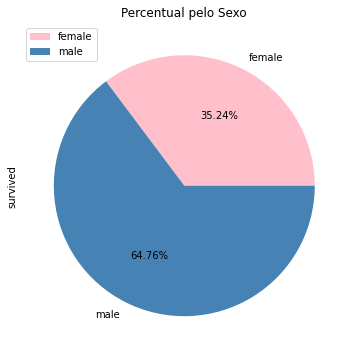

In [ ]:
df.groupby(['sex']).count().plot(y='survived', kind='pie', autopct='%1.2f%%', colors = ['pink', 'steelblue'], figsize=(6,6), 
    title='Percentual pelo Sexo')

2° Criar um gráfico com a biblioteca Pandas que mostre a distribuição da idade das pessoas no Titanic, coluna age no dataset.

Text(0.5, 0, 'Distribuição por idade')

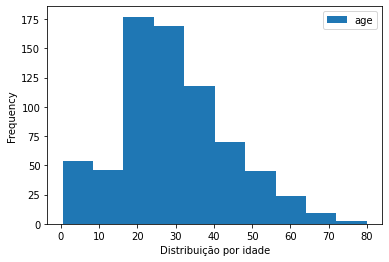

In [ ]:
graf = df.plot(y='age', kind='hist')
graf.set_xlabel('Distribuição por idade')

3° Criar um gráfico com a biblioteca Pandas que mostre a distribuição de idades das pessoas no Titanic, coluna age no dataset separados por sexo em dois gráficos.

In [ ]:
filtro1 = df['sex'] == 'female'
filtro2 = df['sex'] == 'male'

Text(0.5, 0, 'Masculino')

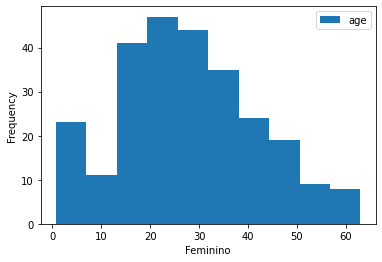

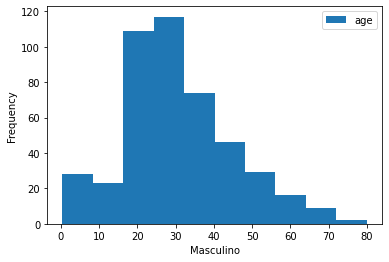

In [ ]:
#Fem = df[filtro1].plot(y='age', kind='hist', figsize=(4,3))
Fem = df[filtro1].plot(y='age', kind='hist')
Fem.set_xlabel('Feminino')
Mas = df[filtro2].plot(y='age', kind='hist')
Mas.set_xlabel('Masculino')

#Ativdade - Aula 2°

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('sample_data/Forbes_Richest_Atheletes_1990_2020.csv')
df.head(2)

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0


1) Construa um gráfico de **barras horizontais** com os top 15 atletas em **média** de ganhos

In [ ]:
maiores_ganhos = df.pivot_table(index='Name', values='earnings ($ million)')
maiores_ganhos.head(2)

,earnings ($ million)
Name,
Aaron Rodgers,49.0
Aaron Rogers,89.3


In [ ]:
filtro = maiores_ganhos['earnings ($ million)'].sort_values(ascending=False)
filtro.head(2)

Name
Floyd Mayweather    168.0
Conor McGregor       99.0
Name: earnings ($ million), dtype: float64

In [ ]:
filtro.index


2) Construa um gráfico de pizza as contagens dos países

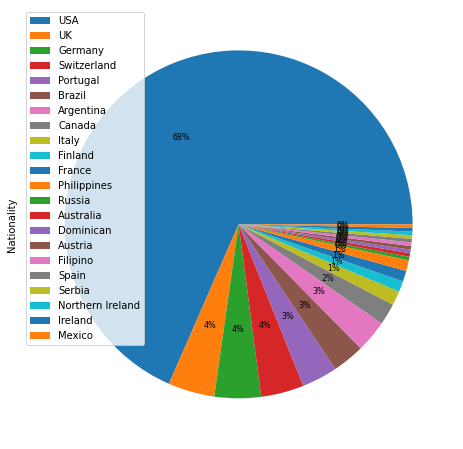

In [ ]:
df['Nationality'].value_counts().plot(y = 'Nationality', kind='pie', autopct='%1.0f%%', 
                                      legend=True, labeldistance=None, figsize=(12,8), fontsize=8);

3) Faça um gráfico de pizza para verificar quais são os 5 esportes mais aparecem nestas listas

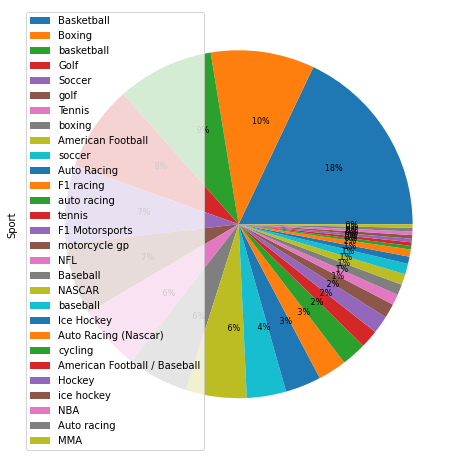

In [ ]:
df['Sport'].value_counts().plot(y = 'Sport', kind='pie', autopct='%8.0f%%', 
                                      legend=True, labeldistance=None, figsize=(12,8), fontsize=8);

4) Verifique se há outliers nos valores de idades dos atletas

**Nao existe a coluna de idade dos atletas no df, todavia verifiquei nas colunas numericas. Existe outliers apenas nos ganhos**

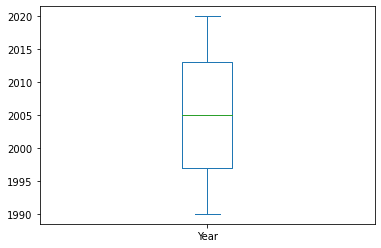

In [ ]:
graf1 = df.plot(kind="box", y="Year")

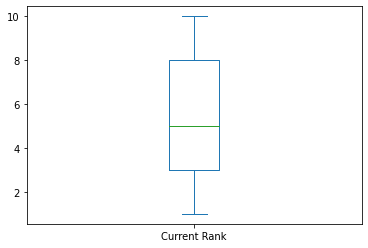

In [ ]:
graf2 = df.plot(kind="box", y="Current Rank")

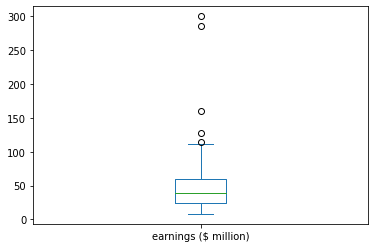

In [ ]:
graf3 = df.plot(kind="box", y="earnings ($ million)")

#Ativdade - Aula 3°

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

1) Faça um gráfico de dispersão da Credit Score pela média do Status

In [43]:
df_loan = pd.read_csv('sample_data/Loan_Default.csv')

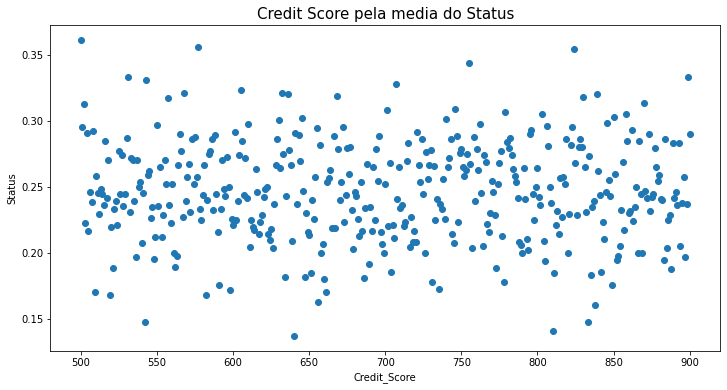

In [ ]:
plt.figure(figsize=(12,6))

df = df_loan.pivot_table(index='Credit_Score', values='Status', aggfunc='mean')
plt.scatter(x=df.index, y=df['Status']);

plt.xlabel('Credit_Score')
plt.ylabel('Status')
plt.title('Credit Score pela media do Status', fontsize=15);

2) Faça um gráfico de colunas que mostra a media de ganhos (coluna income) por faixa etária

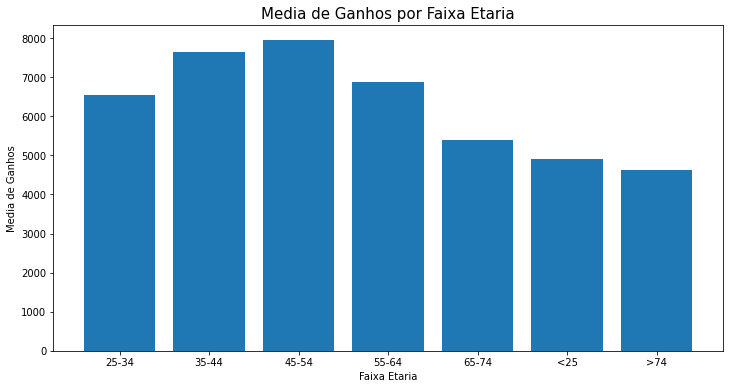

In [ ]:
plt.figure(figsize=(12,6))
df_fe = df_loan.pivot_table(index='age', values='income', aggfunc='mean')
plt.bar(df_fe.index, df_fe['income']);

plt.xlabel('Faixa Etaria')
plt.ylabel('Media de Ganhos')
plt.title('Media de Ganhos por Faixa Etaria', fontsize=15);


3) Como se encontra a distribuição das faixas-etárias nesta base de dados.  
*Obs.: utilize o gráfico de pizza*

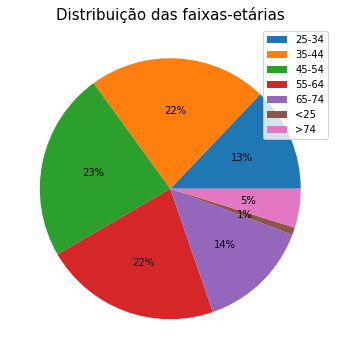

In [49]:
plt.figure(figsize=(12,6))

df_pizza=df_loan.pivot_table(index='age', values='ID', aggfunc='count')

plt.pie('ID', data=df_pizza, autopct='%1.0f%%')
plt.legend(labels=df_pizza.index)

plt.title('Distribuição das faixas-etárias', fontsize=15);

#Ativdade - Aula 4°

Para resolver as questões abaixo utilizar o dataset [tips](https://github.com/mwaskom/seaborn-data/blob/master/tips.csv).

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importe o arquivo

In [51]:
DF = pd.read_csv('sample_data/tips.csv', delimiter=',')
DF.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


1) Qual o valor médio da gorjeta de acordo com o dia da semana?

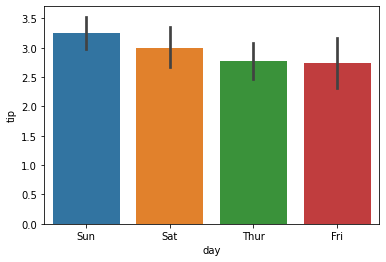

In [54]:
sns.barplot(data=DF, x='day', y='tip');

2) Qual é o melhor horário para o restaurante para o valor médio total da conta (total_bill)? Almoço (Lunch) ou Jantar (Dinner)?

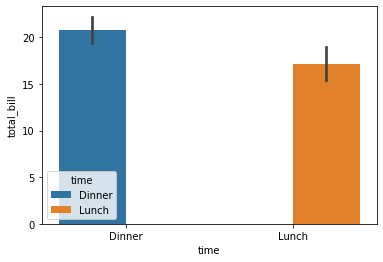

In [56]:
sns.barplot(data=DF, x='time', y='total_bill', hue='time');

3) Qual público dá maior quantidade de gorjetas:

Homens ou mulheres?
Fumantes ou não fumantes?

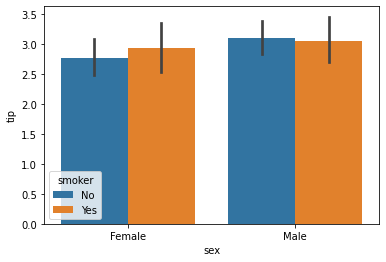

In [55]:
sns.barplot(data=DF, x='sex', y='tip', hue='smoker');

#Ativdade - Aula 5°

Importe a base Loan_Default.csv que está em csv dentro do diretório data.

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


In [58]:
df_loan = pd.read_csv('sample_data/Loan_Default.csv')
df_loan.head(2)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,construction_type,occupancy_type,income,credit_type,Credit_Score,age,submission_of_application,LTV,Region,Status
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,sb,pr,1740.0,EXP,758,25-34,to_inst,98.728814,south,1
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,sb,pr,4980.0,EQUI,552,55-64,to_inst,NaN,North,1


1) Faça um gráfico de colunas que mostra a media de ganhos (coluna income) por faixa etária

In [59]:
df_faixa_et = df_loan.pivot_table(index='age', values='income', aggfunc='mean')
fig = px.bar(x=df_faixa_et.index, y=df_faixa_et['income'], color=df_faixa_et.index)
fig.update_layout(
    xaxis_title={
        'text':'Faixa Etaria'
    },
    yaxis_title = {
        'text':'Media de Ganhos'
    },
    title = {
        'x':0.5,
        'y':0.95,
        'text': 'Media de Ganhos por Faixa Etaria'
    }
)
fig.show()

2) Como se encontra a distribuição das faixas-etárias nesta base de dados.
Obs.: utilize o gráfico de pizza

In [60]:
df_pizza=df_loan.pivot_table(index='age', values='ID', aggfunc='count')
px.pie(names=df_pizza.index, values=df_pizza['ID'],opacity=0.8)

3) Faça um gráfico de dispersão da Credit Score pela média do Status

In [61]:
df_Credit_Score = df_loan.pivot_table(index='Credit_Score', values='Status', aggfunc='mean')
df_Credit_Score
fig = px.scatter(x=df_Credit_Score.index, y=df_Credit_Score['Status'])
fig.update_layout(
    xaxis_title={
        'text':'Credit_Score'
    },
    yaxis_title = {
        'text':'Status'
    },
    title = {
        'x':0.5,
        'y':0.95,
        'text': 'Credit Score pela media do Status'
    }
)
fig.show()